# This notebook has some very basic EDA of the NYC airbnb dataset, then delves into text analysis.

# Importing libraries and data  
Dataset from Kaggle: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

In [196]:
import pandas as pd
import plotly.express as px
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [197]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [198]:
df.describe()  

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [199]:
df.shape    

(48895, 16)

In [200]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [201]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [202]:
#percentage of null values per column
df.isnull().sum() / len(df) * 100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [203]:
px.histogram(df, x = 'neighbourhood_group')

In [204]:
px.histogram(df, x = 'neighbourhood')

In [205]:
px.histogram(df, x = 'room_type')

In [206]:
#remove unnecessary columns
df = df[['name', 'neighbourhood_group', 'reviews_per_month']]

Analyzing descriptions of listings ('name')  
  
Finding most common words

In [207]:
#dropping null values so text in 'name' can be tokenized
#we can drop them because only 3.27% of rows have null values for the 'name' column
df.dropna(subset='name', axis = 0, inplace=True)

This function gets the distribution of the words in the 'name' column of the dataframe

In [208]:
def filter_words(df):
    stop_words = set(stopwords.words('english')) #set of stop words (e.g. a, the, and) which will be deleted
    sentences = df['name'].str.lower().str.cat(sep=' ') #concatenates string in the 'name' column
    words = nltk.tokenize.word_tokenize(sentences) #tokenizes sentences
    words = [w for w in words if not w.lower() in stop_words] #filters stopwords
    final_words=[word.lower() for word in words if word.isalpha()] #filters punctuation
    word_dist = nltk.FreqDist(final_words)#gets distribution of words
    return word_dist

In [209]:
#10 most common words
all_word_dist = filter_words(df)
all_word_dist.most_common(10)

[('room', 10075),
 ('bedroom', 7591),
 ('private', 7171),
 ('apartment', 6668),
 ('cozy', 5035),
 ('apt', 4594),
 ('brooklyn', 4118),
 ('studio', 3977),
 ('spacious', 3745),
 ('manhattan', 3478)]

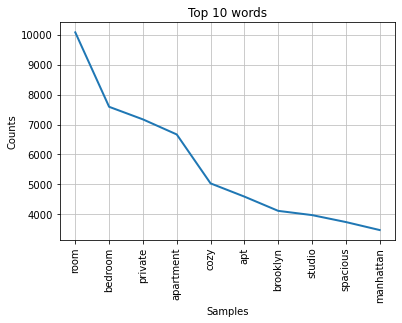

<AxesSubplot:title={'center':'Top 10 words'}, xlabel='Samples', ylabel='Counts'>

In [210]:
plt.title('Top 10 words')
all_word_dist.plot(10)

It seems like most of these words describe the property itself, such as room, bedroom, apartment, etc. Let's look at the adjectives describing these properties.

In [211]:
def filter_adjs(data):
    stop_words = set(stopwords.words('english')) #set of stop words (e.g. a, the, and) which will be deleted
    sentences = data['name'].str.lower().str.cat(sep=' ') #concatenates string in the 'name' column
    words = nltk.tokenize.word_tokenize(sentences) #tokenizes sentences
    tags = nltk.pos_tag(words) #tags on part of speech for words
    adjectives = [w for w, t in tags if t == 'JJ'] #filters out adjectives
    adj_dist = nltk.FreqDist(adjectives) #distribution of adjectives
    return adj_dist

In [212]:
adjective_dist = filter_adjs(df)

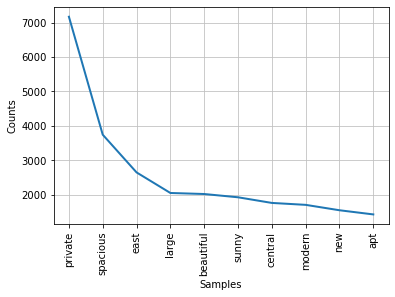

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [213]:
adjective_dist.plot(10)

 This is better, but apt was still classified as an adjective, so lets remove it.

In [214]:
adjective_dist.pop('apt')

1426

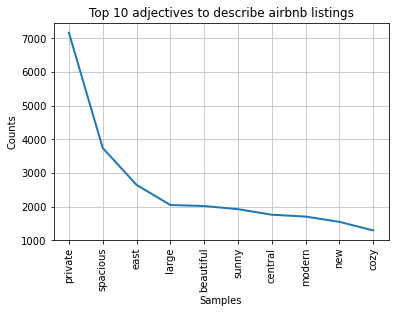

<AxesSubplot:title={'center':'Top 10 adjectives to describe airbnb listings'}, xlabel='Samples', ylabel='Counts'>

In [215]:
plt.title('Top 10 adjectives to describe airbnb listings')
adjective_dist.plot(10)

These were the most common adjectives, but I wanted to find some way to seeing how effective the adjectives were at actually getting customers.  
  
I used the reviews per month as a metric because an airbnb listing with high reviews per month value would probably attract the most people. This would also account for popular new airbnb listings, which may not have as many total reviews as older listings.

Execution Plan:  
1. Select top 1000 airbnb listings with highest amount of reviews per month
2. Extract adjectives from 'name'
3. Get the top 10 adjectives in the 'name' section

In [216]:
df_top1000 = df.sort_values('reviews_per_month', ascending = False)[:1000]

In [217]:
#Extract adjectives from 'name'
top1000_adj = filter_adjs(df_top1000)

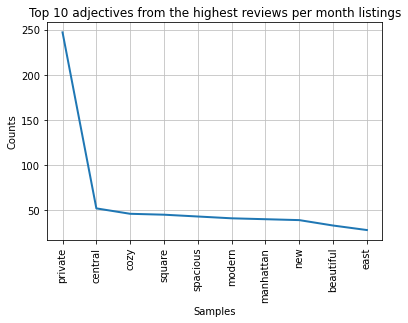

<AxesSubplot:title={'center':'Top 10 adjectives from the highest reviews per month listings'}, xlabel='Samples', ylabel='Counts'>

In [218]:
plt.title('Top 10 adjectives from the highest reviews per month listings')
top1000_adj.plot(10)

Now we start to get an idea of what customers are looking for in an airbnb. Privacy seems to be the most important keyword.  
  
Because Manhattan is seen in the graph, lets see how the distribution of adjectives varies by city

Manhattan and Queens were the most common neighbourhood group in the dataset, so we will be looking at those groups

In [219]:
#Create function that finds the adjective distribution by city
def city_adj(city):
    df_city = df[df['neighbourhood_group'] == city][:1000].sort_values('reviews_per_month', ascending = False)
    city_adjs = filter_adjs(df_city)
    title = 'Adjective Distribution of airbnb listing in ' + city
    plt.title(title)
    city_adjs.plot(10)
    return city_adjs

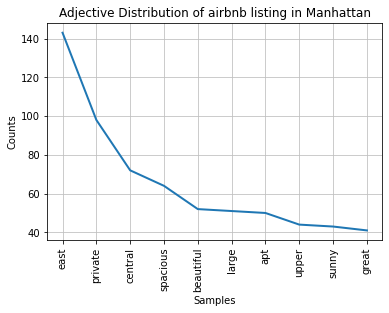

In [220]:
man_adj = city_adj('Manhattan')

apt appears again, so let's remove it

In [221]:
man_adj.pop('apt')

50

Lets also look at the adjective distribution in Queens

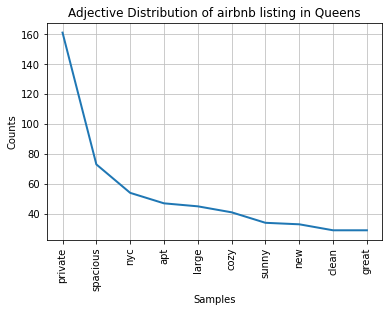

In [222]:
q_adj = city_adj('Queens')

Lets drop apt and nyc since the dataset is only NYC airbnb listings

In [223]:
q_adj.pop('nyc')
q_adj.pop('apt')

47

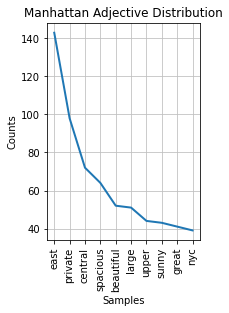

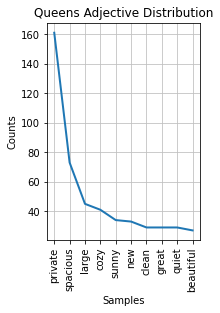

<AxesSubplot:title={'center':'Queens Adjective Distribution'}, xlabel='Samples', ylabel='Counts'>

In [224]:
#Manhattan vs Queens side by side
plt.subplot(1, 2, 1)
plt.title('Manhattan Adjective Distribution')
man_adj.plot(10)
plt.subplot(1, 2, 2)
plt.title('Queens Adjective Distribution')
q_adj.plot(10)

There are some common words such as private, spacious, beautiful, large, and great.  

# Conclusions
From this notebook, we were able to find the most common words in airbnb listings. We then narrowed the words down to adjectives to see the most common words used to describe airbnbs. After that, we took the most frequent adjectives from the top 1000 airbnbs with the most reviews. And out of curiosity, we looked at how the adjective distribution could differ based on neighbourhood group.  
  
It is important to note that 'name' was only one feature that could contribute to an airbnb getting a high number of reviews. Other factors such as price, availability, and minimum nights were not analyzed. Hopefully you enjoyed this simply text analysis!